In [2]:
# Run this cell first to import all required libraries
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"OpenCV: {cv2.__version__}")
print("\n✅ All libraries loaded successfully!")

NumPy: 2.2.6
Pandas: 2.3.3
OpenCV: 4.12.0

✅ All libraries loaded successfully!


---
## 📘 Section 1: NumPy Fundamentals
---

### Exercise 1.1: Array Creation

**Task:** Create a 2D NumPy array representing a grayscale image of size `(100, 150)` filled with zeros. Then print its shape, dimensions, and data type.

*Hint: Use `np.zeros()` with `dtype=np.uint8` for image representation*

In [3]:
img_arr = np.zeros((100,150),dtype=np.uint8)
img_arr.shape
img_arr.ndim
img_arr.dtype

dtype('uint8')

<details>
<summary>🔍 Click to reveal answer</summary>

```python
# Create grayscale image array
gray_image = np.zeros((100, 150), dtype=np.uint8)

print(f"Shape: {gray_image.shape}")      # (100, 150)
print(f"Dimensions: {gray_image.ndim}")  # 2
print(f"Data type: {gray_image.dtype}")  # uint8
```
</details>

### Exercise 1.2: RGB Image Array

**Task:** Create a random RGB image of size `(224, 224, 3)` with pixel values between 0-255. Print its shape and total number of elements.

*Hint: Use `np.random.randint()` for random integers*

In [4]:
img_arr = np.random.randint(0, 256, (224,224,3), dtype=np.uint8)
img_arr.shape
len(img_arr.flatten().flatten())

150528

<details>
<summary>🔍 Click to reveal answer</summary>

```python
# Create random RGB image
rgb_image = np.random.randint(0, 256, (224, 224, 3), dtype=np.uint8)

print(f"Shape: {rgb_image.shape}")  # (224, 224, 3)
print(f"Total elements: {rgb_image.size}")  # 150528
```
</details>

### Exercise 1.3: Array Slicing - Center Crop

**Task:** Given the random image you created above (or create a new one of shape `(200, 300, 3)`), extract a center crop of size `100x100`.

*Hint: Calculate the center coordinates first, then use slicing `[y1:y2, x1:x2]`*

In [5]:
image = np.random.randint(0, 256, (200, 300, 3), dtype=np.uint8)
h, w = image.shape[0:2]
center_x, center_y = w // 2, h // 2

cropped_image = image[center_x - 50:center_x + 50, center_y - 50:center_y + 50]
cropped_image.shape

(100, 100, 3)

<details>
<summary>🔍 Click to reveal answer</summary>

```python
image = np.random.randint(0, 256, (200, 300, 3), dtype=np.uint8)

h, w = image.shape[:2]
crop_size = 100

center_y, center_x = h // 2, w // 2
center_crop = image[
    center_y - crop_size//2 : center_y + crop_size//2,
    center_x - crop_size//2 : center_x + crop_size//2
]

print(f"Original shape: {image.shape}")
print(f"Center crop shape: {center_crop.shape}")  # (100, 100, 3)
```
</details>

### Exercise 1.4: Boolean Indexing

**Task:** Create a grayscale image array of shape `(100, 100)` with random values 0-255. Then:
1. Count how many pixels have values greater than 127
2. Set all pixels greater than 200 to 255 (white)

*Hint: Use boolean masking like `arr[arr > value]`*

In [6]:
image = np.random.randint(0, 256, (100,100), dtype=np.uint8)
np.sum(image > 127)
image[image >200] = 255

<details>
<summary>🔍 Click to reveal answer</summary>

```python
gray = np.random.randint(0, 256, (100, 100), dtype=np.uint8)

# Count pixels > 127
count_bright = np.sum(gray > 127)
print(f"Pixels > 127: {count_bright}")

# Set pixels > 200 to 255
gray[gray > 200] = 255
print(f"Pixels now at 255: {np.sum(gray == 255)}")
```
</details>

### Exercise 1.5: Broadcasting - Adjust RGB Channels

**Task:** Create an RGB image of shape `(100, 100, 3)`. Then use broadcasting to:
- Increase red channel by 20%
- Keep green channel same
- Decrease blue channel by 10%

Make sure to clip values to [0, 255] range!

*Hint: Multiply by `[1.2, 1.0, 0.9]` and use `np.clip()`*

In [7]:
image = np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8)
new_image = np.clip(np.multiply(image, [1.2, 1, 0.9]), 0, 255).astype(np.uint8)

<details>
<summary>🔍 Click to reveal answer</summary>

```python
image = np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8)

# Channel adjustment factors [R, G, B]
adjustments = np.array([1.2, 1.0, 0.9])

# Apply broadcasting and clip
adjusted = np.clip(image * adjustments, 0, 255).astype(np.uint8)

print(f"Original mean per channel: {image.mean(axis=(0,1))}")
print(f"Adjusted mean per channel: {adjusted.mean(axis=(0,1))}")
```
</details>

### Exercise 1.6: Reshape for Deep Learning

**Task:** You have a single image of shape `(224, 224, 3)`. Deep learning models expect a batch dimension. Add a batch dimension to make it `(1, 224, 224, 3)`. Then also convert it to channel-first format `(1, 3, 224, 224)` for PyTorch.

*Hint: Use `np.expand_dims()` or `reshape()`, and `np.transpose()` for reordering*

In [8]:
# YOUR CODE HERE
single_image = np.random.rand(224, 224, 3)

batched_image = np.expand_dims(single_image, axis=0)
batched_image.shape

rechanneled_image = np.transpose(batched_image, (0, 3, 1, 2))
rechanneled_image.shape

(1, 3, 224, 224)

<details>
<summary>🔍 Click to reveal answer</summary>

```python
single_image = np.random.rand(224, 224, 3)

# Add batch dimension (method 1)
batched = np.expand_dims(single_image, axis=0)
print(f"Batched shape: {batched.shape}")  # (1, 224, 224, 3)

# Alternative: batched = single_image.reshape(1, 224, 224, 3)

# Convert to channel-first (NCHW for PyTorch)
nchw = np.transpose(batched, (0, 3, 1, 2))
print(f"Channel-first shape: {nchw.shape}")  # (1, 3, 224, 224)
```
</details>

---
## 📗 Section 2: Pandas for Dataset Management
---

### Exercise 2.1: Create a Dataset DataFrame

**Task:** Create a DataFrame representing an image dataset with the following columns:
- `filename`: 'img_001.jpg' to 'img_010.jpg'
- `label`: randomly assign 'cat', 'dog', or 'bird'
- `width`: random integers between 400 and 1000
- `height`: random integers between 300 and 800

*Hint: Use `np.random.choice()` for labels*

In [9]:
np.random.seed(42)  # For reproducibility
df = pd.DataFrame({'filename': [f'image_00{i}.jpg' for i in range(1, 10)] + [f'image_010.jpg'],
                   'label': np.random.choice(['cat', 'dog', 'bird'],10),
                   'width' : np.random.randint(400,1001, size=10),
                     'height' : np.random.randint(300,801, size=10)
                   })

<details>
<summary>🔍 Click to reveal answer</summary>

```python
np.random.seed(42)

df = pd.DataFrame({
    'filename': [f'img_{i:03d}.jpg' for i in range(1, 11)],
    'label': np.random.choice(['cat', 'dog', 'bird'], 10),
    'width': np.random.randint(400, 1001, 10),
    'height': np.random.randint(300, 801, 10)
})

print(df)
```
</details>

### Exercise 2.2: Filtering Data

**Task:** Using the DataFrame from above (or create a new one with 50 samples):
1. Filter only 'dog' images
2. Filter images where width > 600 AND height > 500
3. Filter images that are either 'cat' or 'bird'

*Hint: Use boolean conditions with `&` for AND, `|` for OR*

In [10]:
# YOUR CODE HERE
np.random.seed(42)
df = pd.DataFrame({
    'filename': [f'img_{i:03d}.jpg' for i in range(1, 51)],
    'label': np.random.choice(['cat', 'dog', 'bird'], 50),
    'width': np.random.randint(400, 1001, 50),
    'height': np.random.randint(300, 801, 50)
})

print(df[df['label'] == 'dog'])

# Filter large images
large_images = df[(df['width'] > 600) & (df['height'] > 500)]

# Filter cats or birds
cats_or_birds = df[df['label'].isin(['cat', 'bird'])]

       filename label  width  height
7   img_008.jpg   dog    908     627
14  img_015.jpg   dog    789     515
16  img_017.jpg   dog    505     398
17  img_018.jpg   dog    876     471
18  img_019.jpg   dog    801     659
19  img_020.jpg   dog    955     513
22  img_023.jpg   dog    669     748
23  img_024.jpg   dog    670     526
30  img_031.jpg   dog    616     517
32  img_033.jpg   dog    779     697
33  img_034.jpg   dog    892     658
35  img_036.jpg   dog    556     692
46  img_047.jpg   dog    791     540
48  img_049.jpg   dog    688     395
49  img_050.jpg   dog    778     687


<details>
<summary>🔍 Click to reveal answer</summary>

```python
# Filter only dogs
dogs = df[df['label'] == 'dog']
print(f"Dogs: {len(dogs)}")

# Filter large images (width > 600 AND height > 500)
large_images = df[(df['width'] > 600) & (df['height'] > 500)]
print(f"Large images: {len(large_images)}")

# Filter cats or birds
cats_or_birds = df[df['label'].isin(['cat', 'bird'])]
# Alternative: df[(df['label'] == 'cat') | (df['label'] == 'bird')]
print(f"Cats or Birds: {len(cats_or_birds)}")
```
</details>

### Exercise 2.3: GroupBy Analysis

**Task:** Analyze the dataset:
1. Count the number of images per class
2. Calculate the mean width and height for each class
3. Find the class with the largest average image area

*Hint: Use `value_counts()`, `groupby()`, and `agg()`*

In [11]:
class_counts = df['label'].value_counts()
print(class_counts)

mean_width, mean_height = df['width'].mean(), df['height'].mean()
print(f"Mean Width: {mean_width}, Mean Height: {mean_height}")

mean_dims = df.groupby('label')[['width', 'height']].mean()
print(mean_dims)

df['area'] = df['width'] * df['height']
mean_area = df.groupby('label')['area'].mean()
print(mean_area)
print(mean_area.idxmax())



label
bird    20
cat     15
dog     15
Name: count, dtype: int64
Mean Width: 707.6, Mean Height: 535.74
            width  height
label                    
bird   627.000000  480.45
cat    771.133333  569.00
dog    751.533333  576.20
label
bird    307558.400000
cat     441859.266667
dog     435090.133333
Name: area, dtype: float64
cat


<details>
<summary>🔍 Click to reveal answer</summary>

```python
# 1. Count per class
class_counts = df['label'].value_counts()
print("Images per class:")
print(class_counts)

# 2. Mean dimensions per class
mean_dims = df.groupby('label')[['width', 'height']].mean()
print("\nMean dimensions per class:")
print(mean_dims)

# 3. Class with largest average area
df['area'] = df['width'] * df['height']
mean_area = df.groupby('label')['area'].mean()
largest_class = mean_area.idxmax()
print(f"\nClass with largest average area: {largest_class}")
print(mean_area)
```
</details>

### Exercise 2.4: Train/Val/Test Split

**Task:** Split the dataset into train (60%), validation (20%), and test (20%) sets using stratified splitting to maintain class balance. Add a 'split' column to track which set each image belongs to.

*Hint: Use `train_test_split` from sklearn with `stratify` parameter*

In [12]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, stratify=train_val_df['label'], random_state=42)

df['split'] = 'train'
df.loc[val_df.index, 'split'] = 'val'
df.loc[test_df.index, 'split'] = 'test'

<details>
<summary>🔍 Click to reveal answer</summary>

```python
from sklearn.model_selection import train_test_split

# First split: train+val (80%) vs test (20%)
train_val_df, test_df = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df['label']
)

# Second split: train (75% of 80% = 60%) vs val (25% of 80% = 20%)
train_df, val_df = train_test_split(
    train_val_df, test_size=0.25, random_state=42, stratify=train_val_df['label']
)

# Add split column
df['split'] = 'train'
df.loc[df.index.isin(val_df.index), 'split'] = 'val'
df.loc[df.index.isin(test_df.index), 'split'] = 'test'

print(f"Train: {len(train_df)} ({len(train_df)/len(df)*100:.0f}%)")
print(f"Val: {len(val_df)} ({len(val_df)/len(df)*100:.0f}%)")
print(f"Test: {len(test_df)} ({len(test_df)/len(df)*100:.0f}%)")

print("\nDistribution check:")
print(df.groupby(['split', 'label']).size().unstack(fill_value=0))
```
</details>

---
## 📕 Section 3: OpenCV Basics
---

### Exercise 3.1: Create and Save a Synthetic Image

**Task:** 
1. Create a solid blue image of size `(200, 300, 3)` using NumPy
2. Save it as 'blue_image.jpg' using OpenCV
3. Read it back and verify the shape

**Remember:** OpenCV uses BGR format, so blue = (255, 0, 0) not (0, 0, 255)!

In [13]:
blue_image = np.zeros((200, 300, 3), dtype=np.uint8)
blue_image[:, :] = [255, 0, 0] 

cv2.imwrite('blue_image.jpg', blue_image)
loaded_image = cv2.imread('blue_image.jpg')
loaded_image.shape

(200, 300, 3)

<details>
<summary>🔍 Click to reveal answer</summary>

```python
# Create blue image (BGR format: Blue=255, Green=0, Red=0)
blue_image = np.zeros((200, 300, 3), dtype=np.uint8)
blue_image[:, :] = [255, 0, 0]  # BGR

# Save image
cv2.imwrite('blue_image.jpg', blue_image)
print("Image saved!")

# Read it back
loaded = cv2.imread('blue_image.jpg')
print(f"Loaded shape: {loaded.shape}")

# Display using matplotlib (convert to RGB)
plt.imshow(cv2.cvtColor(loaded, cv2.COLOR_BGR2RGB))
plt.title('Blue Image')
plt.axis('off')
plt.show()
```
</details>

### Exercise 3.2: Color Space Conversions

**Task:** Create a random color image and:
1. Convert it from BGR to RGB
2. Convert it to Grayscale
3. Convert it to HSV
4. Display all four versions side by side

*Hint: Use `cv2.cvtColor()` with appropriate flags*

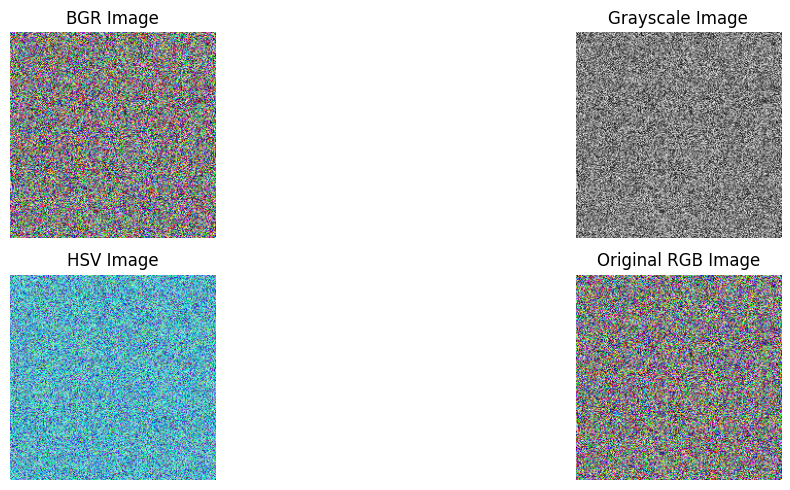

In [14]:
image = np.random.randint(0, 256, (200, 200, 3), dtype=np.uint8)
bgr_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
grayscale_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)
hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)

fig, axes = plt.subplots(2, 2, figsize=(15, 5))
axes[0, 0].imshow(bgr_image)
axes[0, 0].set_title('BGR Image')
axes[0, 1].imshow(grayscale_image, cmap='gray')
axes[0, 1].set_title('Grayscale Image')
axes[1, 0].imshow(hsv_image)
axes[1, 0].set_title('HSV Image')
axes[1, 1].imshow(image)
axes[1, 1].set_title('Original RGB Image')
for ax in axes.flatten():
    ax.axis('off')
plt.tight_layout()
plt.show()

<details>
<summary>🔍 Click to reveal answer</summary>

```python
image = np.random.randint(0, 256, (200, 200, 3), dtype=np.uint8)

# Conversions
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Display
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original (BGR→RGB)')

axes[1].imshow(rgb)
axes[1].set_title('RGB')

axes[2].imshow(gray, cmap='gray')
axes[2].set_title('Grayscale')

axes[3].imshow(hsv)
axes[3].set_title('HSV')

for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()
```
</details>

### Exercise 3.3: Resize with Aspect Ratio

**Task:** Write a function `resize_maintain_aspect(image, max_size)` that resizes an image so that its longest side equals `max_size` while maintaining the aspect ratio.

Test it with a `(300, 500, 3)` image and `max_size=200`.

In [15]:
def resize_maintain_aspect(image, max_size):
    h, w = image.shape[:2]
    scale = max_size / max(h, w)
    new_h, new_w = int(h * scale), int(w * scale)
    return cv2.resize(image, (new_w, new_h))

test_img = np.random.randint(0, 256, (300, 500, 3), dtype=np.uint8)
resized_img = resize_maintain_aspect(test_img, 200)
resized_img.shape

(120, 200, 3)

<details>
<summary>🔍 Click to reveal answer</summary>

```python
def resize_maintain_aspect(image, max_size):
    """Resize image keeping aspect ratio with longest side = max_size"""
    h, w = image.shape[:2]
    
    # Find the longest side
    if h > w:
        # Height is longer
        new_h = max_size
        new_w = int(w * (max_size / h))
    else:
        # Width is longer or equal
        new_w = max_size
        new_h = int(h * (max_size / w))
    
    return cv2.resize(image, (new_w, new_h))

# Test
test_img = np.random.randint(0, 256, (300, 500, 3), dtype=np.uint8)
resized = resize_maintain_aspect(test_img, 200)

print(f"Original: {test_img.shape}")
print(f"Resized: {resized.shape}")  # Should be (120, 200, 3)
```
</details>

### Exercise 3.4: Gaussian Blur Comparison

**Task:** Apply Gaussian blur with three different kernel sizes (3, 9, 21) to an image and display them side by side to see the effect of kernel size.

*Hint: Kernel size must be odd numbers*

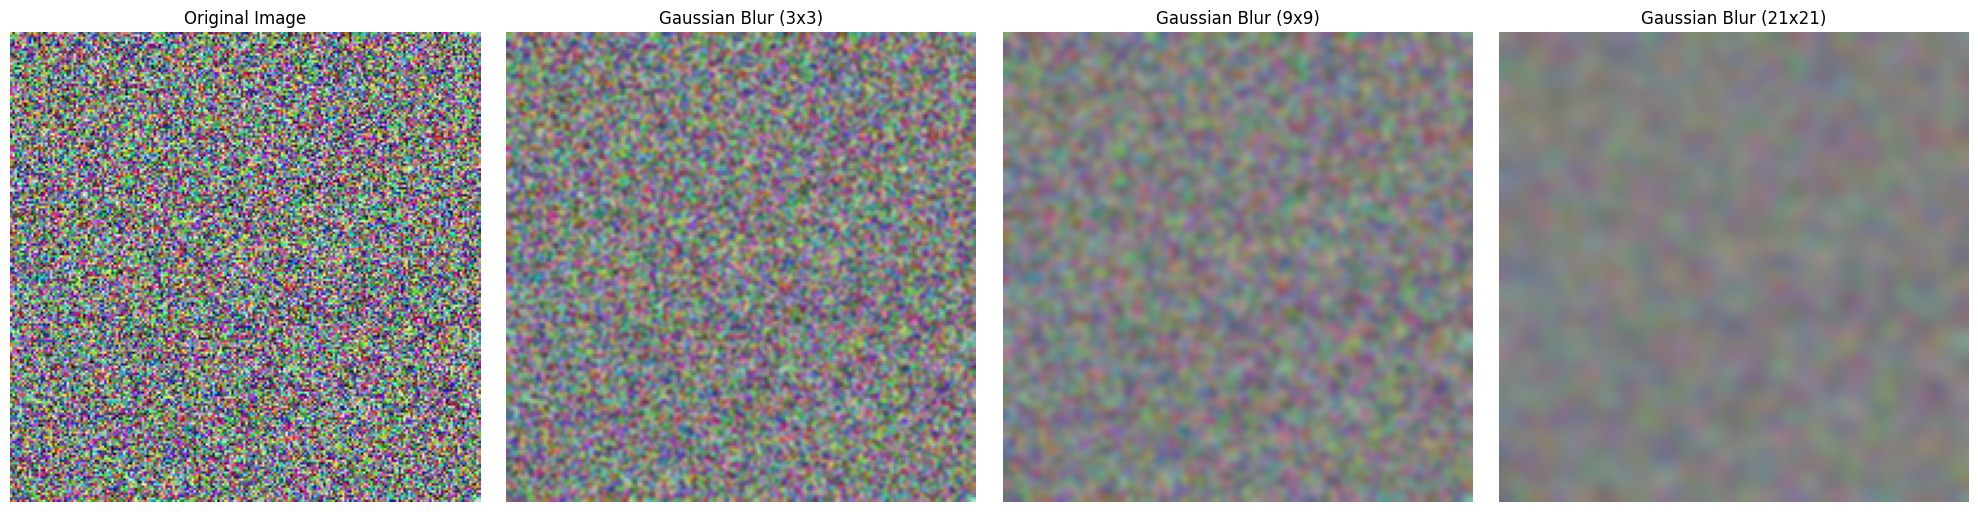

In [16]:
image = np.random.randint(0, 256, (200, 200, 3), dtype=np.uint8)
g1_image = cv2.GaussianBlur(image, (3,3), 0)
g2_image = cv2.GaussianBlur(image, (9,9), 0)
g3_image = cv2.GaussianBlur(image, (21,21), 0)

axes = plt.subplots(1, 4, figsize=(20,5))[1]
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[1].imshow(g1_image)
axes[1].set_title('Gaussian Blur (3x3)')        
axes[2].imshow(g2_image)
axes[2].set_title('Gaussian Blur (9x9)')
axes[3].imshow(g3_image)
axes[3].set_title('Gaussian Blur (21x21)')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

<details>
<summary>🔍 Click to reveal answer</summary>

```python
image = np.random.randint(0, 256, (200, 200, 3), dtype=np.uint8)

blur_3 = cv2.GaussianBlur(image, (3, 3), 0)
blur_9 = cv2.GaussianBlur(image, (9, 9), 0)
blur_21 = cv2.GaussianBlur(image, (21, 21), 0)

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

images = [image, blur_3, blur_9, blur_21]
titles = ['Original', 'Kernel 3x3', 'Kernel 9x9', 'Kernel 21x21']

for ax, img, title in zip(axes, images, titles):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()
```
</details>

---
## 🔥 Section 4: Combined Challenges
---

### Challenge 4.1: Image Statistics with NumPy

**Task:** Create a random RGB image and calculate:
1. Mean pixel value (overall)
2. Mean pixel value per channel (R, G, B separately)
3. Normalize the image to range [0, 1]
4. Standardize the image (zero mean, unit variance)

*Hint: Use axis parameter in mean() for per-channel stats*

In [17]:
image = np.random.randint(0, 256, (200, 200, 3), dtype=np.uint8)

overall_mean = image.mean()
print(overall_mean)

channel_means = image.mean(axis=(0, 1))
print(channel_means)


127.324975
[127.07045  127.989175 126.9153  ]


<details>
<summary>🔍 Click to reveal answer</summary>

```python
image = np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8)

# 1. Overall mean
overall_mean = image.mean()
print(f"Overall mean: {overall_mean:.2f}")

# 2. Per-channel mean
channel_mean = image.mean(axis=(0, 1))
print(f"Per-channel mean (R, G, B): {channel_mean}")

# 3. Normalize to [0, 1]
normalized = (image - image.min()) / (image.max() - image.min())
print(f"Normalized range: [{normalized.min():.4f}, {normalized.max():.4f}]")

# 4. Standardize
standardized = (image - image.mean()) / image.std()
print(f"Standardized mean: {standardized.mean():.6f}")
print(f"Standardized std: {standardized.std():.6f}")
```
</details>

### Challenge 4.2: Batch Processing Pipeline

**Task:** Simulate a data loading pipeline:
1. Create 5 random images of different sizes
2. Store their info in a Pandas DataFrame (filename, original_h, original_w)
3. Resize all images to 224x224
4. Stack them into a batch of shape (5, 224, 224, 3)
5. Calculate the mean pixel value per image in the batch

In [19]:
sizes = [(150, 150), (300, 200), (400, 300), (500, 400), (250, 250)]
images = [np.random.randint(0, 256, (h, w, 3), dtype=np.uint8) for w, h in sizes]

df = pd.DataFrame({
    'filename': [f'img_{i+1:03d}.jpg' for i in range(len(images))],
    'width': [img.shape[1] for img in images],
    'height': [img.shape[0] for img in images],
})
print(df)

resize = [cv2.resize(img,(224,224)) for img in images]
df['resized_image'] = resize
print(df)

batch = np.stack(resize)
print(batch.shape)

means = batch.mean(axis=(3,1,2))
df['mean_pixel'] = means

print(df)

      filename  width  height
0  img_001.jpg    150     150
1  img_002.jpg    300     200
2  img_003.jpg    400     300
3  img_004.jpg    500     400
4  img_005.jpg    250     250
      filename  width  height  \
0  img_001.jpg    150     150   
1  img_002.jpg    300     200   
2  img_003.jpg    400     300   
3  img_004.jpg    500     400   
4  img_005.jpg    250     250   

                                       resized_image  
0  [[[7, 66, 151], [96, 73, 138], [192, 90, 136],...  
1  [[[77, 49, 228], [77, 90, 171], [157, 25, 48],...  
2  [[[92, 117, 66], [90, 101, 96], [47, 150, 136]...  
3  [[[130, 54, 83], [157, 103, 88], [107, 122, 64...  
4  [[[41, 40, 217], [43, 199, 196], [173, 232, 17...  
(5, 224, 224, 3)
      filename  width  height  \
0  img_001.jpg    150     150   
1  img_002.jpg    300     200   
2  img_003.jpg    400     300   
3  img_004.jpg    500     400   
4  img_005.jpg    250     250   

                                       resized_image  mean_pixel  
0  [[[7,

<details>
<summary>🔍 Click to reveal answer</summary>

```python
np.random.seed(42)

# 1. Create 5 random images of different sizes
sizes = [(200, 300), (400, 300), (150, 200), (500, 400), (250, 250)]
images = [np.random.randint(0, 256, (h, w, 3), dtype=np.uint8) for h, w in sizes]

# 2. Store info in DataFrame
df = pd.DataFrame({
    'filename': [f'img_{i}.jpg' for i in range(5)],
    'original_h': [img.shape[0] for img in images],
    'original_w': [img.shape[1] for img in images]
})
print("Image Info:")
print(df)

# 3. Resize all to 224x224
resized_images = [cv2.resize(img, (224, 224)) for img in images]

# 4. Stack into batch
batch = np.stack(resized_images)
print(f"\nBatch shape: {batch.shape}")  # (5, 224, 224, 3)

# 5. Mean pixel value per image
means = batch.mean(axis=(1, 2, 3))
df['mean_pixel'] = means
print("\nWith mean pixel values:")
print(df)
```
</details>

### Challenge 4.3: Simple Edge Detection Pipeline

**Task:** Build a complete edge detection pipeline:
1. Create a synthetic image with a white rectangle on black background
2. Convert to grayscale
3. Apply Gaussian blur
4. Apply Canny edge detection
5. Display original and edges side by side

*Hint: Use `cv2.rectangle()` to draw or NumPy slicing*

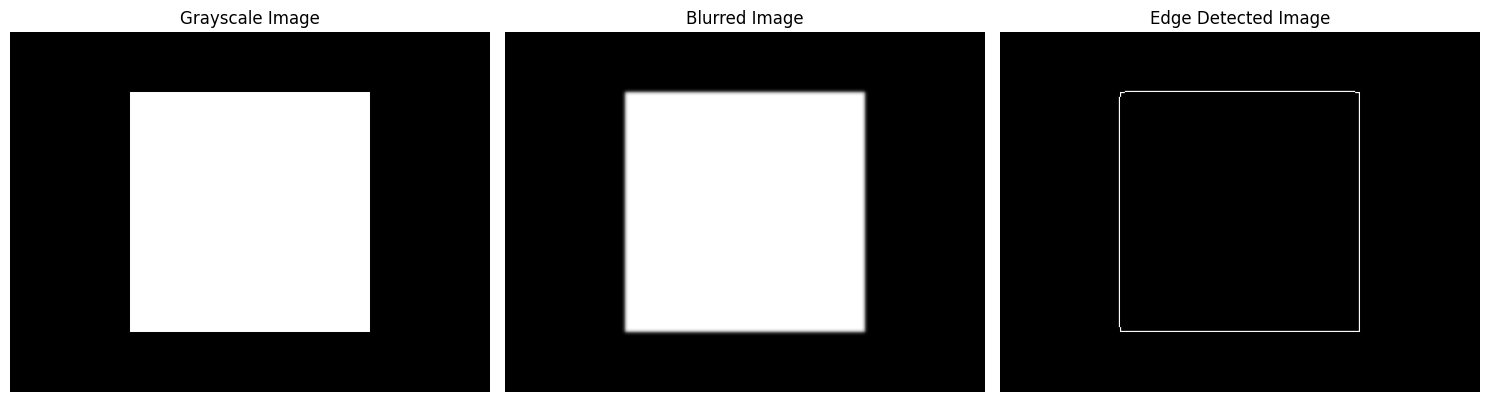

In [ ]:
import cv2, numpy as np
image = np.zeros((300, 400, 3), dtype=np.uint8)
image[50:250, 100:300] = 255  

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (7,7), 0)

edges = cv2.Canny(blurred, 50, 150)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(gray, cmap='gray')
axes[0].set_title('Grayscale Image')
axes[1].imshow(blurred, cmap='gray')    
axes[1].set_title('Blurred Image')
axes[2].imshow(edges, cmap='gray')
axes[2].set_title('Edge Detected Image')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

<details>
<summary>🔍 Click to reveal answer</summary>

```python
# 1. Create synthetic image with white rectangle
image = np.zeros((300, 400, 3), dtype=np.uint8)
image[50:250, 100:300] = 255  # White rectangle using NumPy slicing
# Or: cv2.rectangle(image, (100, 50), (300, 250), (255, 255, 255), -1)

# 2. Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3. Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 4. Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# 5. Display
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original')

axes[1].imshow(blurred, cmap='gray')
axes[1].set_title('Blurred')

axes[2].imshow(edges, cmap='gray')
axes[2].set_title('Canny Edges')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()
```
</details>

### Challenge 4.4: Image Brightness Analysis with Pandas

**Task:** Create a mini analysis pipeline:
1. Generate 10 random grayscale images of shape (100, 100)
2. Create a DataFrame with columns: image_id, mean_brightness, min_val, max_val, std
3. Classify each image as 'dark' (mean < 85), 'medium' (85-170), or 'bright' (> 170)
4. Count how many images fall into each category

In [ ]:
gray_images = np.random.randint(0, 256, (10, 100, 100), dtype=np.uint8)

df = pd.DataFrame({
    'id': [i for i in range(1, len(gray_images) + 1)],
    'mean_brightness': [img.mean() for img in gray_images],
    'min_val': [img.min() for img in gray_images],
    'max_val': [img.max() for img in gray_images],
    'std': [img.std() for img in gray_images]
})

df['look']= pd.cut(df['mean_brightness'], bins=[-1, 85, 170, 255], labels=['dark', 'medium', 'bright'], right=True)

print(df['look'].value_counts())

look
medium    10
dark       0
bright     0
Name: count, dtype: int64


<details>
<summary>🔍 Click to reveal answer</summary>

```python
np.random.seed(42)

# 1. Generate 10 random grayscale images
images = [np.random.randint(0, 256, (100, 100), dtype=np.uint8) for _ in range(10)]

# 2. Create DataFrame with statistics
df = pd.DataFrame({
    'image_id': range(10),
    'mean_brightness': [img.mean() for img in images],
    'min_val': [img.min() for img in images],
    'max_val': [img.max() for img in images],
    'std': [img.std() for img in images]
})

# 3. Classify brightness
def classify_brightness(mean_val):
    if mean_val < 85:
        return 'dark'
    elif mean_val <= 170:
        return 'medium'
    else:
        return 'bright'

df['category'] = df['mean_brightness'].apply(classify_brightness)

print("Image Analysis:")
print(df)

# 4. Count per category
print("\nImages per category:")
print(df['category'].value_counts())
```
</details>

### 🏆 Final Challenge: Complete Preprocessing Function

**Task:** Write a function `preprocess_for_model(image, target_size=(224, 224))` that:
1. Resizes image to target_size
2. Converts from BGR to RGB
3. Normalizes pixel values to [0, 1]
4. Adds batch dimension
5. Returns the preprocessed tensor

This simulates what you'd do before feeding an image to a neural network!

In [ ]:
# YOUR CODE HERE
def preprocess_for_model(image, target_size=(224, 224)):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = image.astype(np.float32) / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Test
test_image = np.random.randint(0, 256, (480, 640, 3), dtype=np.uint8)

<details>
<summary>🔍 Click to reveal answer</summary>

```python
def preprocess_for_model(image, target_size=(224, 224)):
    """
    Preprocess an image for neural network input.
    
    Args:
        image: BGR image as numpy array
        target_size: (width, height) tuple
    
    Returns:
        Preprocessed image with shape (1, H, W, 3) and values in [0, 1]
    """
    # 1. Resize
    resized = cv2.resize(image, target_size)
    
    # 2. Convert BGR to RGB
    rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
    
    # 3. Normalize to [0, 1]
    normalized = rgb.astype(np.float32) / 255.0
    
    # 4. Add batch dimension
    batched = np.expand_dims(normalized, axis=0)
    
    return batched

# Test
test_image = np.random.randint(0, 256, (480, 640, 3), dtype=np.uint8)
processed = preprocess_for_model(test_image)

print(f"Input shape: {test_image.shape}")
print(f"Output shape: {processed.shape}")
print(f"Output dtype: {processed.dtype}")
print(f"Output range: [{processed.min():.4f}, {processed.max():.4f}]")
```
</details>

---
## 🎉 Nice work kiddos!

Proud of yall to do this extra assignment. Just FYI, along the way you got hands-on with:

- NumPy array creation and manipulation  
- Slicing, indexing, and boolean operations  
- Broadcasting and vectorized computations  
- Reshaping arrays for deep learning workflows  
- Building and filtering Pandas DataFrames  
- GroupBy analysis and train/test splits  
- OpenCV color space conversions and resizing  
- Image blurring and edge detection  
- Putting it all together in real-world CV pipelines  

### 💡 Things to remember
- Images are just NumPy arrays — get comfortable with array ops  
- OpenCV uses BGR while matplotlib expects RGB (easy to mess up!)  
- Pandas helps keep datasets clean, structured, and reproducible  
- Vectorization beats loops by a *huge* margin (often 50–100× faster)

Keep the momentum going, make me proud! 
Love yall <3